# Módulo 02 - Fundamentos do Processamento de Imagens

Neste módulo de introdução às técnicas de Processamento de Imagem, você vai conhecer os fundamentos da manipulação da imagem, além de desenvolver projetos como chroma keying e detecção de desmatamento a partir de imagens de satélites.

![Imagens](img/m02.png)

Este notebook faz parte do programa da [Especialização em Visão Computacional](https://escola.sigmoidal.ai/especializacao-em-visao-computacional).

---


## Seção 1 - Teoria das Cores

É importante entender o que estamos prestes a fazer. Vamos usar o método `plt.imshow(img)`. Este método é parte da biblioteca *matplotlib*, e é usado para plotar a imagem.

Vale ressaltar que o método `plt.imshow()` espera que a imagem seja no formato RGB, mas a biblioteca *OpenCV* carrega imagens no formato BGR. Portanto, se você estiver carregando sua imagem usando *OpenCV*, será necessário converter os canais de cores de BGR para RGB antes de plotar a imagem. No entanto, neste exemplo, estamos plotando a imagem sem fazer essa conversão.

In [2]:
# importar bibliotecas
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import sigmoidal as sig

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

### Dividindo os Canais

No processamento de imagens, frequentemente é necessário manipular canais de cores individuais. Para separar os canais de uma imagem, utiliza-se a função `cv2.split(img)`, que divide a imagem em seus componentes de cor primários. Cada canal pode então ser analisado ou alterado isoladamente, o que é útil em várias aplicações, como na correção de cores ou na filtragem de fundo.


Shape da imagem: (500, 750, 3)


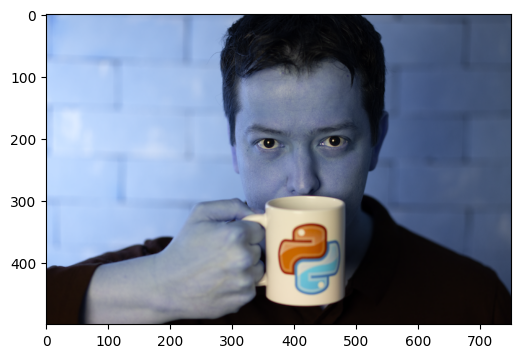

In [5]:
# Lendo a imagem do caminho especificado
img = cv2.imread("../data/carlos.png")

# Verificando se a imagem foi carregada corretamente
if img is not None:
    # Imprimindo a forma (dimensões) da imagem usando f-string para melhor formatação
    print(f'Shape da imagem: {img.shape}')
    # Imprimindo a imagem
    plt.imshow(img)
else:
    # Se img for None, significa que a imagem não foi carregada corretamente
    print("Erro ao carregar a imagem. Verifique se o caminho está correto.")

Novamente, vamos nos preparar para a próxima linha de código. Agora, utilizaremos `plt.imshow(img[...,::-1])`. O que estamos fazendo aqui é inverter a ordem dos canais de cores da imagem. Lembre-se que mencionamos anteriormente que *OpenCV* carrega as imagens no formato BGR, enquanto métodos como `plt.imshow()` esperam que a imagem esteja no formato RGB.

O trecho `[...,::-1]` é uma operação de fatiamento em Python que inverte a ordem dos canais. Em termos simples, estamos convertendo a imagem de BGR para RGB.

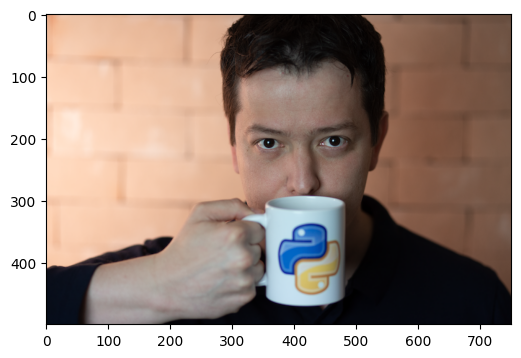

In [6]:
# convertendo a imagem para RGB
img_correta = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plotando a imagem correta
plt.imshow(img[..., ::-1]);

### Mesclando os Canais

Após a conclusão da manipulação desejada, os canais podem ser reunidos em uma única imagem com o uso da função `cv2.merge([canal1, canal2, canal3])`. Este processo de divisão e mesclagem é essencial para a manipulação avançada e análise de imagens digitais.


Text(0.5, 1.0, 'Imagem RGB')

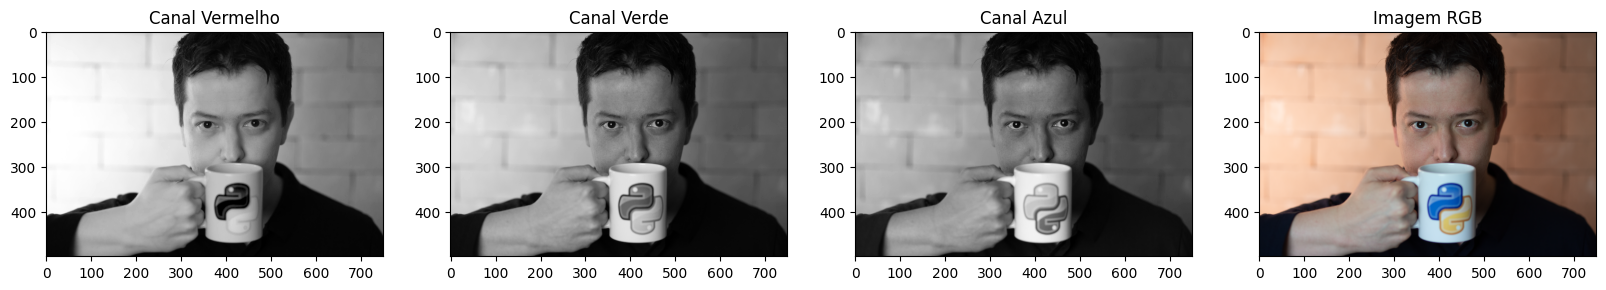

In [7]:
# Dividindo a imagem em seus respectivos canais de cor.
b, g, r = cv2.split(img)

# Criando uma nova figura com tamanho específico.
plt.figure(figsize=[20,5])

plt.subplot(141);
plt.imshow(r);
plt.title('Canal Vermelho')

plt.subplot(142);
plt.imshow(g);
plt.title('Canal Verde')

plt.subplot(143);
plt.imshow(b);
plt.title('Canal Azul')

# realizando o merge dos canais
img_merged = cv2.merge((b, g, r))

# plots com canais separados e imagem final composta
plt.subplot(144);
plt.imshow(img_merged[...,::-1]);
plt.title('Imagem RGB')

No trecho de código acima, nós realizamos as seguintes etapas:

1. Dividimos a imagem em seus canais de cores separados com `b, g, r = cv2.split(img)`. Isso nos dá três imagens em escala de cinza, cada uma representando a quantidade de azul, verde e vermelho, respectivamente, em cada pixel da imagem.

2. Realizamos um novo *merge* da imagem usando `img_merged = cv2.merge((b, g, r))`. Isso nos dá a imagem original novamente.

3. Com `plt.subplot()`, pudemos ver os canais da imagem isoladamente, e a imagem original reconstruída novamente.

### Imagens com Transparência (Canal Alpha)

No exemplo anterior, carregamos uma imagem sem transparência. Como você viu, ao executar `img.shape` houve apenas 3 canais. Agora, vamos lidar com um tipo diferente de imagem **- uma imagem PNG que contém um canal alfa de transparência.**

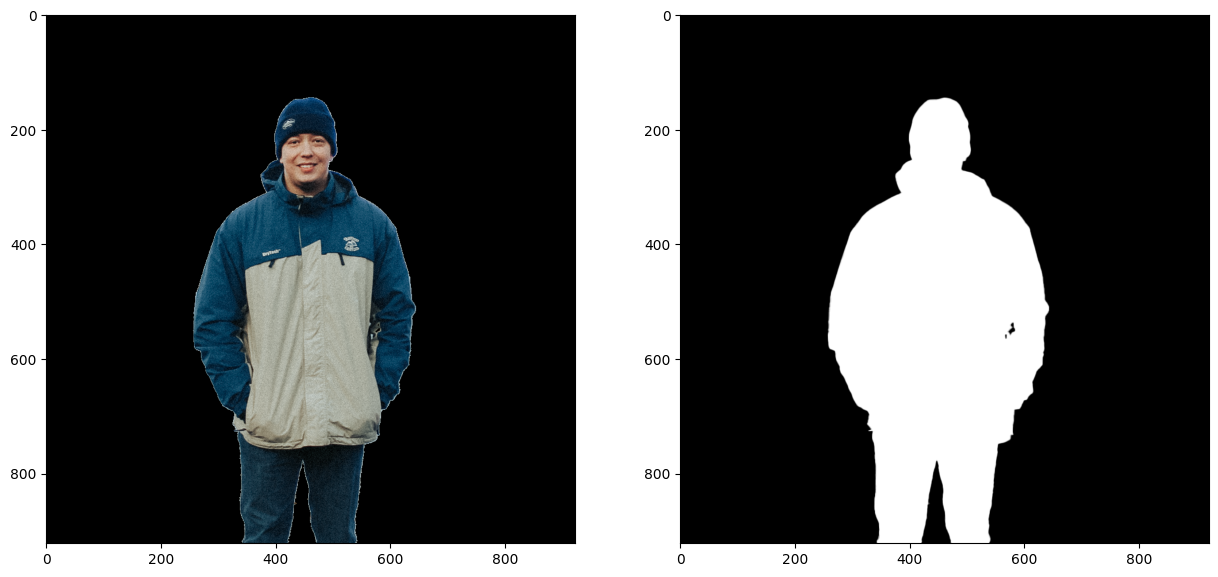

In [8]:
# carregar imagem com canal alpha
ushuaia = cv2.imread('../data/ushuaia.png', -1)

# Sua imagem BGR e canal alfa
ushuaia_bgr = ushuaia[:,:,0:3]
ushuaia_alpha = ushuaia[:,:,3]

# Criar uma imagem em branco com o mesmo tamanho que a imagem original
blank_image = np.zeros(ushuaia_bgr.shape, dtype=np.uint8)

# Aplicar a máscara alfa à imagem BGR
ushuaia_bgr_masked = cv2.bitwise_and(ushuaia_bgr, ushuaia_bgr, mask=ushuaia_alpha)

# Exibir a imagem BGR com a máscara alfa aplicada
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(ushuaia_bgr_masked[:,:,::-1]);
plt.subplot(122);plt.imshow(ushuaia_alpha, cmap='gray');

Quando carregamos essa imagem com `cv2.imread()`, passando `-1` como segundo argumento para garantir que todos os canais (incluindo o alfa) sejam carregados, notamos que a função `img.shape` retorna 4 canais.

Isso acontece porque as imagens PNG podem conter um quarto canal, o canal alfa. Este canal adiciona informações de transparência à imagem, permitindo que certos pixels da imagem sejam parcial ou totalmente transparentes.

Dessa forma, ao manipular ou visualizar este tipo de imagem, é importante levar em consideração este quarto canal. Veja como temos que fazer:

1. `ushuaia_bgr = ushuaia[:,:,0:3]` e `ushuaia_alpha = ushuaia[:,:,3]` separam a imagem original em seus canais de cor (BGR) e canal alfa. O canal alfa é uma camada de imagem que controla a transparência de cada pixel da imagem.

2. `blank_image = np.zeros(ushuaia_bgr.shape, dtype=np.uint8)` cria uma imagem totalmente preta com as mesmas dimensões da imagem original. Esta imagem será usada como base para aplicar a máscara alfa.

3. `ushuaia_bgr_masked = cv2.bitwise_and(ushuaia_bgr, ushuaia_bgr, mask=ushuaia_alpha)` aplica a máscara alfa à imagem BGR. A função `cv2.bitwise_and()` realiza uma operação AND bit a bit entre a imagem BGR e ela mesma, mas considerando apenas os pixels onde a máscara alfa é diferente de zero. Isso efetivamente "aplica" a transparência da máscara alfa à imagem BGR.

4. Finalmente, `plt.imshow(ushuaia_bgr_masked[:,:,::-1])` e `plt.imshow(ushuaia_alpha, cmap='gray')` exibem a imagem BGR com a máscara alfa aplicada e o canal alfa isolado, respectivamente. Note que `[...,::-1]` é usado para converter a imagem de BGR para RGB para exibição correta.
